<a href="https://colab.research.google.com/github/PedroDubas/Captcha_recognition/blob/master/Captcha_HACKAV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir /root/.kaggle
meu_json = '{"username":"kleyer","key":"b986abecaefe13f01f8073272b3c6f7e"}'
with open('/root/.kaggle/kaggle.json', 'w+') as f:
    f.write(meu_json)

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
!kaggle datasets download fournierp/captcha-version-2-images
!kaggle competitions download -c digit-recognizer

!unzip captcha-version-2-images.zip

captcha-version-2-images.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
Archive:  captcha-version-2-images.zip
replace samples/226md.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [3]:

# Commented out IPython magic to ensure Python compatibility.
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
# %matplotlib inline
import imutils
import zipfile
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean
import pandas as pd

# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
# %matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
# %matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


Using TensorFlow backend.


In [0]:
train = pd.read_csv("train.csv")
treino = pd.DataFrame().reindex_like(train).dropna()

In [0]:
fulldata = treino.copy()

In [0]:
def trataImagem(caminho,treino):
    img = cv2.imread(caminho, 0)
    th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 17, 2)

    ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    blur = cv2.GaussianBlur(img, (5, 5), 0)
    ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


    kernel = np.ones((3,3), np.uint8)
    dilation = cv2.dilate(th, kernel, iterations=1)
    dilation2 = cv2.dilate(th2, kernel, iterations=1)
    dilation3 = cv2.dilate(th3, kernel, iterations=1)


    erosion = cv2.erode(dilation, kernel, iterations=1)
    erosion2 = cv2.erode(dilation2, kernel, iterations=1)
    erosion3 = cv2.erode(dilation3, kernel, iterations=1)


    kernel = np.ones((3,1), np.uint8)
    dilation = cv2.dilate(erosion, kernel, iterations=1)
    dilation2 = cv2.dilate(erosion2, kernel, iterations=1)
    dilation3 = cv2.dilate(erosion3, kernel, iterations=1)

    titles4 = ['Original', 'Adaptive', "Otsu", 'Gaussian + Otsu']
    images4 = [img, dilation, dilation2, dilation3]
    

    #Get the individual letters.
    x, y, w, h = 30, 12, 21, 36
    idx=0
    for  i in range(5):
        
        
        crop_img = dilation3[y:y+h, x:x+w]
        
        image_resized = resize(crop_img, (28.0, 28.0),anti_aliasing=True).astype("int32")
        rows,cols = image_resized.shape # gives dimensions for RGB array
        img_size = rows*cols
        img_1D_vector = image_resized.reshape(img_size)
        
        lista = img_1D_vector.tolist()
        lista.insert(0,str(caminho[-9:][i]))
        
        new_row = pd.DataFrame(columns=treino.columns,data=[lista]) 
        treino = treino.append(new_row,ignore_index=True)   
        #cv2.imwrite('caracteres/'+str(caminho[-9:][i])+".png",crop_img)
        cv2.rectangle(dilation3, (x, y), (x + w, y + h), (0, 255, 0), 1)
        x += w
        idx +=1

    titles3 = ['Original', 'Adaptive', "Otsu", 'Gaussian + Otsu']
    images3 = [img, dilation, dilation2, dilation3] #img, opening, opening2, opening3]

    
    #plt.imshow(img)
    #plt.show()
    #
    #plt.imshow(dilation3, 'gray')
    #plt.title('Contouring')
    #plt.show()
    
    return treino

In [7]:
import glob

path = 'samples'

files = [f for f in glob.glob(path + "**/*.png", recursive=True)]
idx=0
for file in files:
    fulldata = fulldata.append(trataImagem(file,treino),ignore_index=True)
    idx+=1
    print(idx)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [8]:
fulldata

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,b,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,y,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3,m,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,y,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,m,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,c,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,y,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,f,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,x,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [0]:
lista = fulldata.loc[25][1:].values.astype('int32')

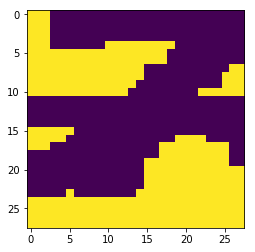

784

In [10]:
img2 = lista.reshape(28,28)
plt.imshow(img2)
plt.show()
len(lista)

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

list_of_values = ['0','1','2','3','4','5','6','7','8','9']

In [0]:
#numeros = fulldata[fulldata['label'].isin(list_of_values)].astype('int32')
numeros = fulldata

In [0]:
X_train = (numeros.iloc[:,1:].values).astype('float32') # all pixel values
#y_train = numeros.iloc[:,0].values.astype('int32') # only labels i.e targets digits
y_train = numeros.iloc[:,0].values

In [14]:
X_train

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.]], dtype=float32)

In [15]:
y_train

array(['b', 'b', 'y', ..., '8', '8', 'x'], dtype=object)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)

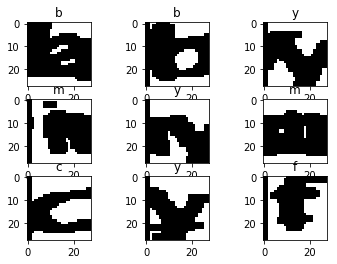

In [17]:
for i in range(0, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [18]:
x =int(len(numeros)*0.80)
train = numeros[:x]
test = numeros[x+1:]

print(len(train))
print(len(test))

4160
1039


In [0]:
#train.head(1).values

In [20]:
Y_train = train["label"]
Y_train.shape

(4160,)

In [21]:
#X_train = train.drop(labels = ["label"],axis = 1) 
X = (train.iloc[:,1:].values).astype('float32') # all pixel values
X.shape

(4160, 784)

n    411
m    227
5    227
f    225
4    224
x    218
g    216
c    209
8    208
3    208
2    208
6    208
7    205
p    202
d    199
e    197
y    191
w    189
b    188
Name: label, dtype: int64

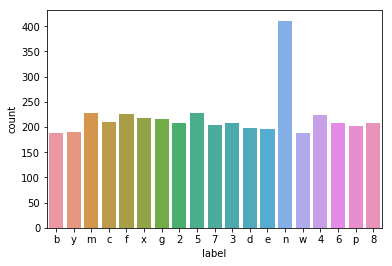

In [22]:
g = sns.countplot(Y_train)
Y_train.value_counts()

In [23]:
test.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [24]:
#Y_train2 = to_categorical(Y_train, num_classes = 19)

Y_train2 = pd.get_dummies(Y_train)
target_labels = Y_train2.columns
target = Y_train2.as_matrix()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [0]:
Y_train = target.astype("float32")

In [26]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)

In [0]:
X_train = X.reshape(-1,28,28,1)

In [28]:
X_train.shape

(4160, 28, 28, 1)

In [29]:
Y_train.shape

(4160, 19)

In [0]:
random_seed = 2

X_train, X_val, Y_train, Y_val = train_test_split(X_train.astype('int32'), Y_train, test_size = 0.1, random_state=random_seed)

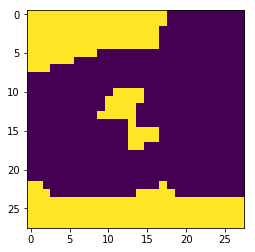

In [31]:
g = plt.imshow(X_train[0][:,:,0])

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
#model.add(Dense(10, activation = "softmax"))
model.add(Dense(19, activation = "softmax"))

In [0]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [0]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
epochs = 60 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [0]:
datagen.fit(X_train)

In [64]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/60
43/43 [==============================] - 1s 30ms/step - loss: 2.2930 - acc: 0.3035 - val_loss: 1.2507 - val_acc: 0.6442
Epoch 2/60
43/43 [==============================] - 1s 20ms/step - loss: 1.4042 - acc: 0.5880 - val_loss: 0.7314 - val_acc: 0.7861
Epoch 3/60
43/43 [==============================] - 1s 22ms/step - loss: 1.0384 - acc: 0.6935 - val_loss: 0.5739 - val_acc: 0.8389
Epoch 4/60
43/43 [==============================] - 1s 22ms/step - loss: 0.8659 - acc: 0.7470 - val_loss: 0.5142 - val_acc: 0.8558
Epoch 5/60
43/43 [==============================] - 1s 22ms/step - loss: 0.7192 - acc: 0.7845 - val_loss: 0.4728 - val_acc: 0.8630
Epoch 6/60
43/43 [==============================] - 1s 22ms/step - loss: 0.6749 - acc: 0.7989 - val_loss: 0.4086 - val_acc: 0.8774
Epoch 7/60
43/43 [==============================] - 1s 22ms/step - loss: 0.5959 - acc: 0.8204 - val_loss: 0.4058 - val_acc: 0.8894
Epoch 8/60
43/43 [==============================] - 1s 22ms/step - loss: 0.5940 - a

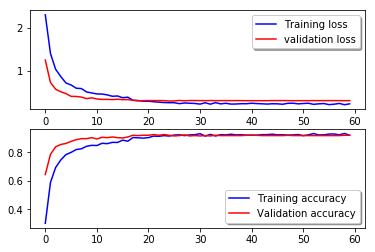

In [65]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


In [0]:
classes = ['2','3','4','5','6','7','8','b','c','d','e','f','g','m','n','p','w','x','y']

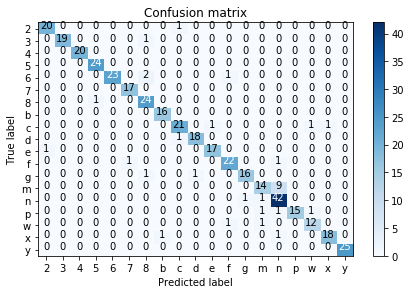

In [67]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap,aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = classes)

In [43]:
Y_pred_classes

array([18,  1,  8,  2, 13, 14, 16, 10, 15, 14, 14,  7, 14, 16,  4,  2, 17,
        3,  4,  4, 14, 11,  7,  6,  8, 11,  1,  6, 15,  7, 12, 15,  3, 17,
       11, 14,  2,  3,  0, 10,  0,  6,  5, 14, 15, 16, 11, 16,  6, 17,  2,
        3, 10,  9, 14, 10,  6,  5,  5, 13, 12, 17, 14, 14, 16, 15, 14, 17,
        7,  0, 17,  1, 14,  5,  6,  2, 11,  9, 12,  4, 12,  8,  4, 14,  4,
        3, 12,  0, 17,  5, 12, 14,  1, 13, 16,  2,  2, 16, 13,  2,  0,  6,
        4, 15, 12, 14, 14, 13,  9, 14,  6, 16,  0, 11,  4, 15,  9, 16,  6,
       11, 17, 18, 10,  2,  5,  3,  1,  7,  9,  0, 14,  4,  8,  6, 12, 14,
       11,  0,  0, 18, 14,  8, 13, 13, 15,  9, 14, 12, 14, 16, 18,  4,  1,
       12, 14, 17, 10,  7, 14,  6, 11,  3, 12,  4, 11,  3, 14,  9,  0,  6,
        4,  9,  9, 18,  4, 16, 10,  6, 15, 11,  0,  2,  6,  7, 12, 11, 14,
        8, 18,  3,  8,  3, 18, 11, 10,  3,  4, 13, 18,  7,  9, 17,  4,  5,
        3, 17,  5, 18, 17,  1, 10, 18,  9,  8,  1, 15, 14,  9, 12,  2, 13,
       10, 14,  7,  3, 13